In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders
#, load_img

In [4]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [6]:
os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/')

['kidneyData.csv', 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']

In [7]:
os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

['Cyst', 'Tumor', 'Stone', 'Normal']

In [8]:
path_main = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Cyst

Number of elements: 3709

First item's name: Cyst- (3178).jpg

***************************
Folder: Tumor

Number of elements: 2283

First item's name: Tumor- (1913).jpg

***************************
Folder: Stone

Number of elements: 1377

First item's name: Stone- (209).jpg

***************************
Folder: Normal

Number of elements: 5077

First item's name: Normal- (1381).jpg

***************************


In [9]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [10]:
path_normal = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
path_stone = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
path_cyst = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
path_tumor = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'

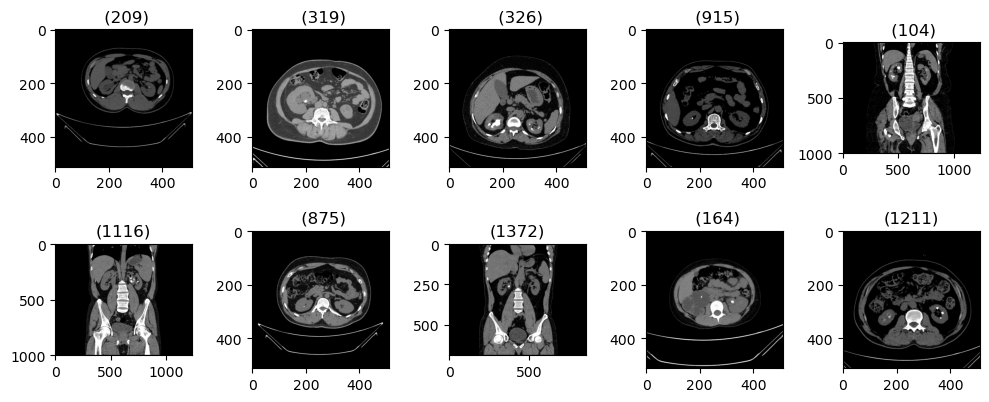

In [11]:
#stone
plot_imgs(path_stone, 10)

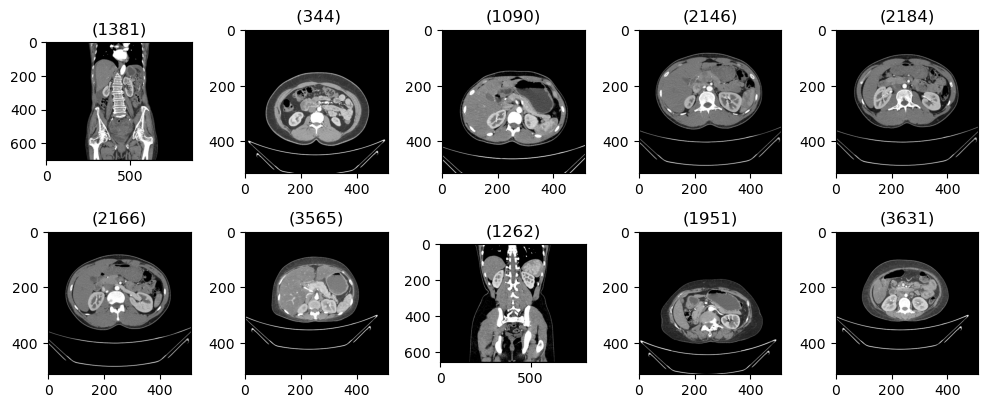

In [12]:
#normal 
plot_imgs(path_normal, 10)

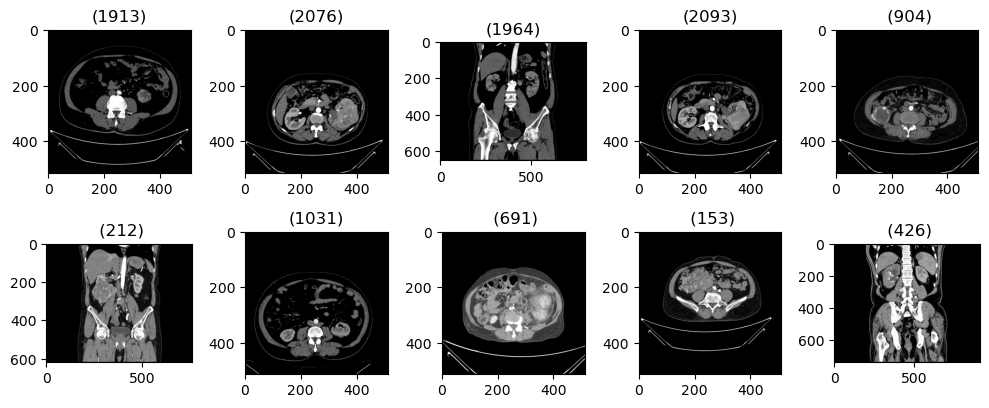

In [13]:
#CT with Tumor
plot_imgs(path_tumor, 10)

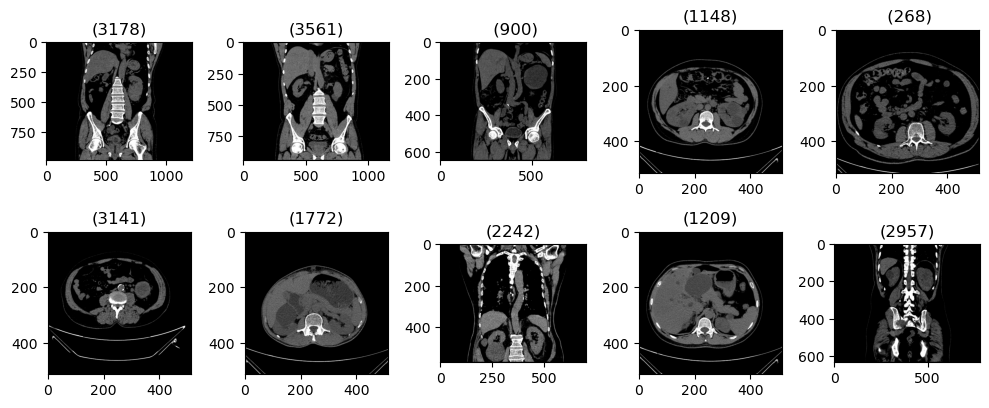

In [15]:
#CT with Cyst
plot_imgs(path_cyst, 10)

In [16]:
splitfolders.ratio(
    "../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 12446 files [02:18, 89.62 files/s] 


In [17]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [18]:
train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [19]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train_dataset.image_shape), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
 
])

In [20]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [21]:
model_fit = model.fit(train_dataset,
                      validation_data=valid_dataset,
                      steps_per_epoch = 3,
                      epochs = 30)

Epoch 1/30
3/3 [==============================] - 74s 32s/step - loss: 1.3652 - accuracy: 0.3000 - precision: 0.5909 - recall: 0.0433 - val_loss: 1.2811 - val_accuracy: 0.4082 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 61s 27s/step - loss: 1.2813 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2249 - val_accuracy: 0.4694 - val_precision: 0.8257 - val_recall: 0.1449
Epoch 3/30
3/3 [==============================] - 61s 27s/step - loss: 1.2030 - accuracy: 0.5500 - precision: 0.6061 - recall: 0.2000 - val_loss: 1.1643 - val_accuracy: 0.6216 - val_precision: 0.7500 - val_recall: 0.0942
Epoch 4/30
3/3 [==============================] - 61s 27s/step - loss: 1.0603 - accuracy: 0.6733 - precision: 0.7913 - recall: 0.3033 - val_loss: 1.0324 - val_accuracy: 0.6441 - val_precision: 0.7124 - val_recall: 0.5604
Epoch 5/30
3/3 [==============================] - 60s 27s/step - loss: 0.9936 - accuracy: 0.6133 - p

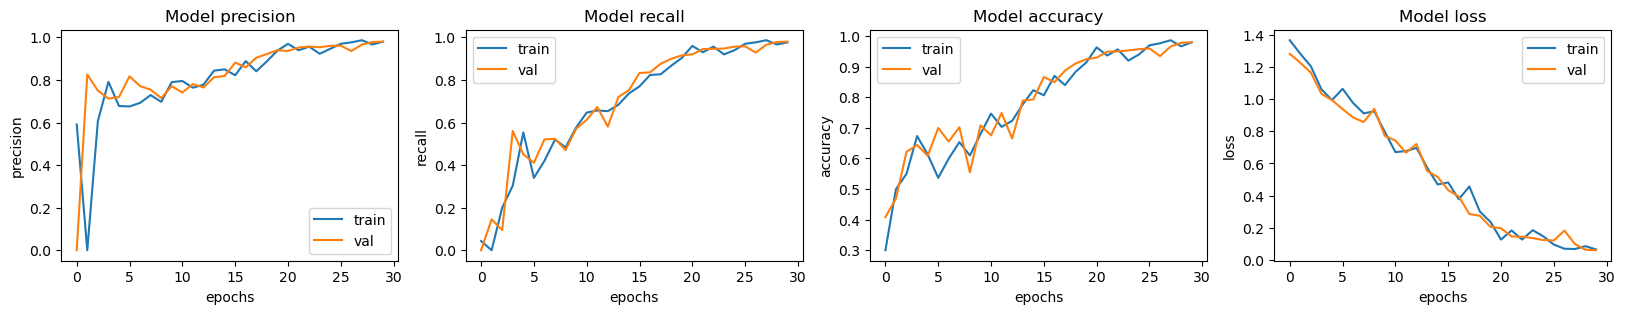

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [23]:
predictions = model.predict(test_dataset)

13/13 [==============================] - 26s 2s/step


In [24]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

In [26]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

Accuracy: 0.9831865492393915
Precision: 0.9807497303442324
Recall: 0.9716525505778069
F1_score: 0.9759106128112658


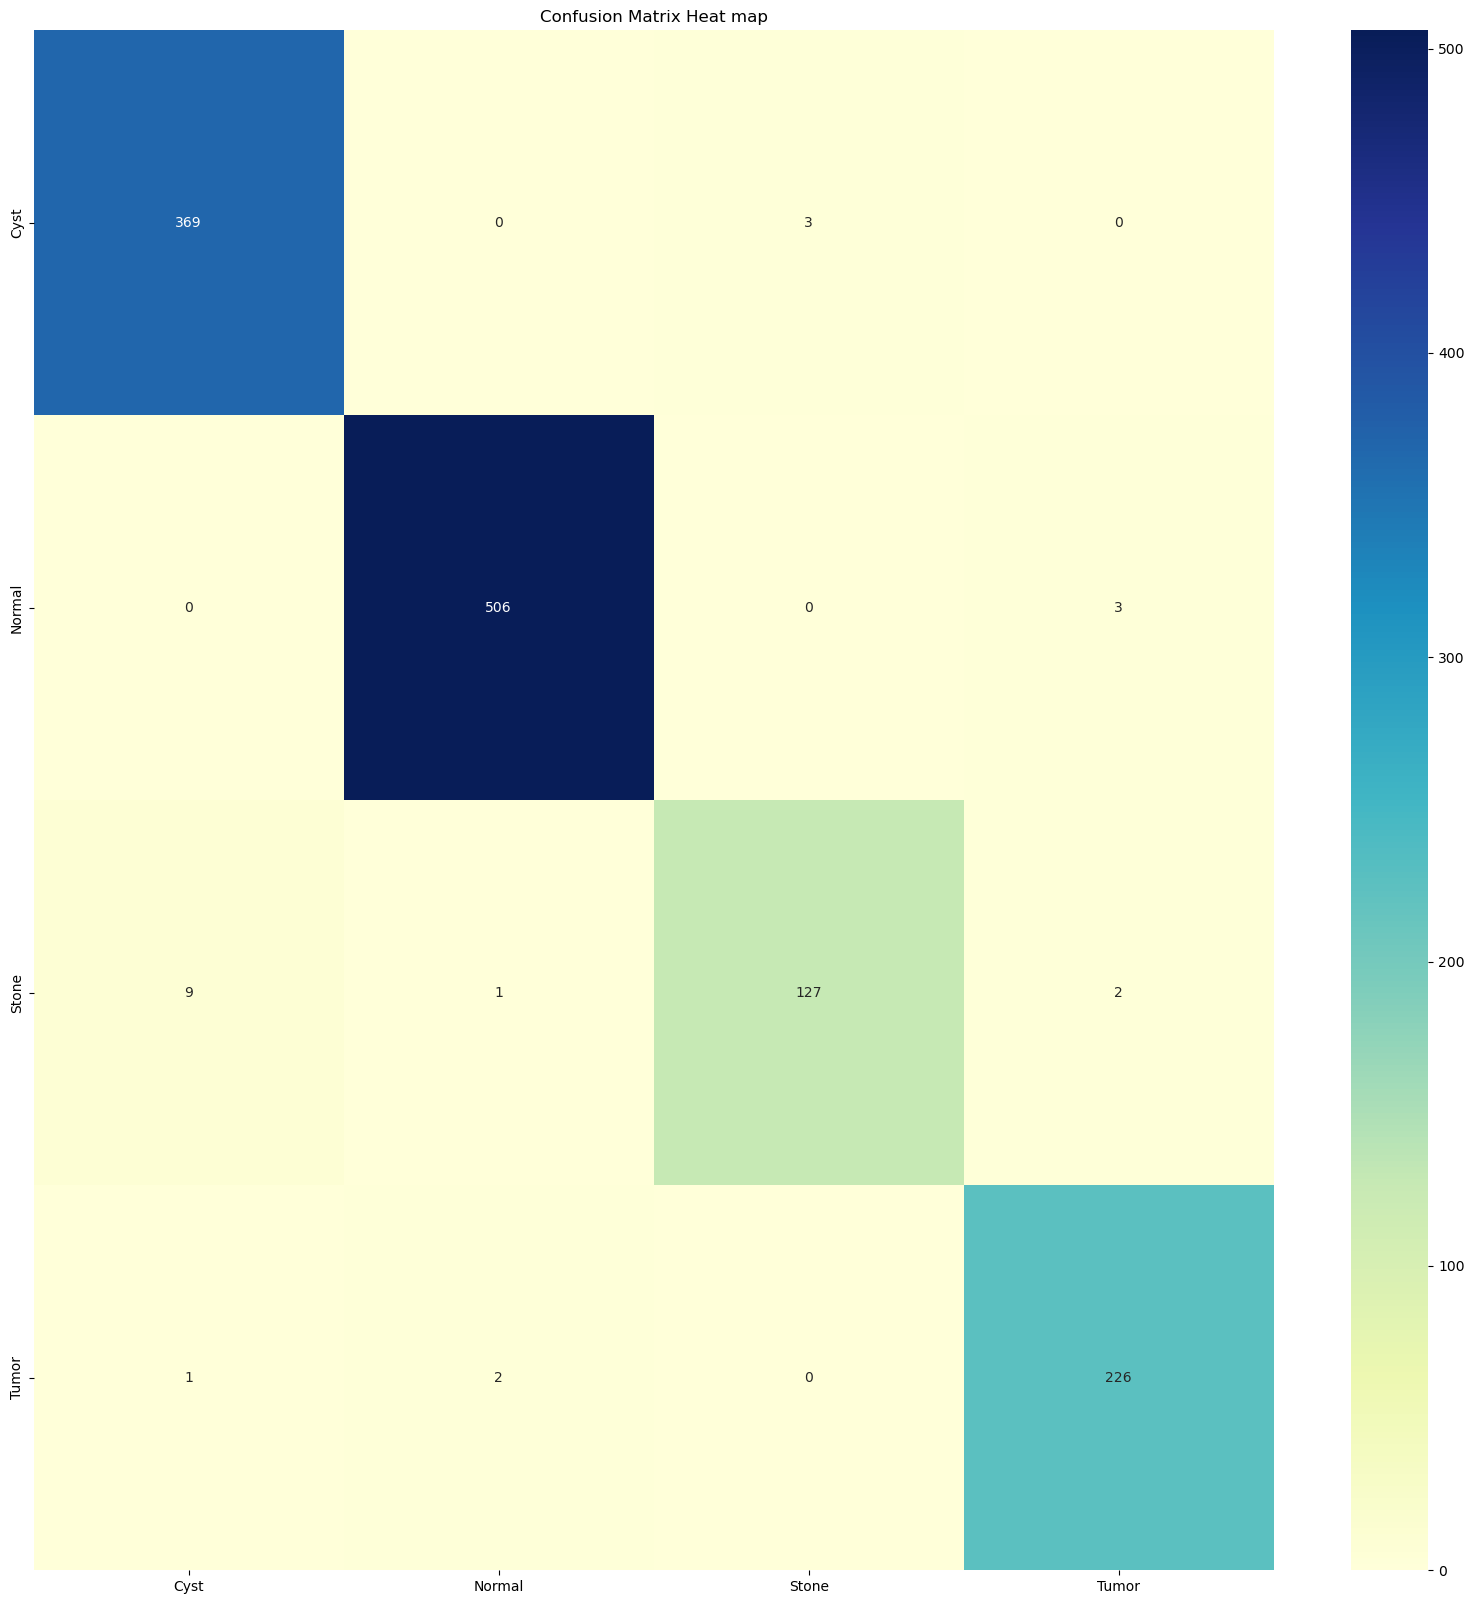

In [27]:
evaluate(test_dataset.classes,predictions)

In [28]:
#test accuracy 
model.evaluate(test_dataset)

13/13 [==============================] - 26s 2s/step - loss: 0.0564 - accuracy: 0.9832 - precision: 0.9840 - recall: 0.9832


[0.0564451739192009,
 0.9831865429878235,
 0.9839743375778198,
 0.9831865429878235]

In [29]:
model.save("kidney_disease.h5")